In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [0]:
# Models
from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Activation, Dropout
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras import Model

# Data preparation
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Plotting and display
from IPython.display import display
from matplotlib import pyplot as plt

np.random.seed(0)

# arabic digits

## load dataset

In [0]:
train = pd.read_csv('/content/drive/My Drive/Digit Recognizer/train.csv')
# since the test.csv set has no labels, we won't be using it
# we will just split the test set out from the train set 
print(train.shape)
print(train.iloc[:,0].unique())

(42000, 785)
[1 0 4 7 3 5 8 9 2 6]


In [0]:
# Scale the image pixel values from 0-255 to 0-1 range so the neural net can converge faster
train.iloc[:, 1:] = train.iloc[:, 1:] / 255

In [0]:
train, test = train_test_split(train, test_size=0.25)

In [0]:
print(train.shape)
print(test.shape)

(31500, 785)
(10500, 785)


In [0]:
# Separate the label from the data
train_X = train.iloc[:, 1:].values
train_y = train.iloc[:, 0].values.reshape(-1,1)
test_X = test.iloc[:, 1:].values
test_y = test.iloc[:, 0].values.reshape(-1,1)

In [0]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(31500, 784)
(31500, 1)
(10500, 784)
(10500, 1)


In [0]:
# function to One-hot encode the categorical values
def one_hot_encode_categories(y):
    
    encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

    y_one_hot = pd.DataFrame(encoder.fit_transform(y), columns=encoder.get_feature_names())
        
    return y_one_hot, encoder

In [0]:
# One hot encode y
train_y_onehot, encoder = one_hot_encode_categories(train_y)
train_y_onehot.columns = pd.DataFrame(train_y_onehot.columns)[0].apply(lambda x: x[-1])

test_y_onehot, encoder = one_hot_encode_categories(test_y)
test_y_onehot.columns = pd.DataFrame(test_y_onehot.columns)[0].apply(lambda x: x[-1])

print(train_y_onehot.head())
print(70*'*')
print(test_y_onehot.head())

0    0    1    2    3    4    5    6    7    8    9
0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
3  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
**********************************************************************
0    0    1    2    3    4    5    6    7    8    9
0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0


## display digits

In [0]:
# reshape the train digits into 28x28 entries
# so we can plot those pixels
train_X_reshaped = train_X.reshape(-1,28,28)

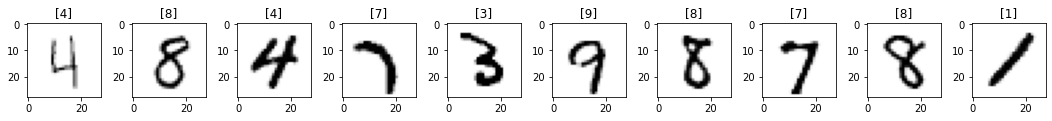

In [0]:
def plot_sample_images(X, y, images_to_show=10, random=True):

    fig = plt.figure(1)

    images_to_show = min(X.shape[0], images_to_show)

    # Set the canvas based on the numer of images
    fig.set_size_inches(18.5, images_to_show * 0.3)

    # Generate random integers (non repeating)
    if random == True:
        idx = np.random.choice(range(X.shape[0]), images_to_show, replace=False)
    else:
        idx = np.arange(images_to_show)
        
    # Print the images with labels
    for i in range(images_to_show):
        plt.subplot(images_to_show/10 + 1, 10, i+1)
        plt.title(str(y[idx[i]]))
        plt.imshow(X[idx[i], :, :], cmap='Greys')


plot_sample_images(train_X_reshaped, train_y)

## simple CNN model

look into code to graphically represent a NN

In [0]:
def model_definition():
    # Define a simple model in Keras
    model = Sequential()

    # Add layers to the model

    # Add convolutional layer
    model.add(Conv2D(50, kernel_size=(5,5), input_shape=(28,28,1)))

    # Add ReLu activation function
    model.add(Activation('relu'))

    # Add dropout layer for generalization
    model.add(Dropout(0.05))

    # Add maxpool layer
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))

    # Add batch normalization to help learning and avoid vanishing or exploding gradient
    model.add(BatchNormalization())

    # Add convolutional layer
    model.add(Conv2D(50, kernel_size=(3,3)))

    # Add ReLu activation function
    model.add(Activation('relu'))

    # Add dropout layer for generalization
    model.add(Dropout(0.05))

    # Maxpool layer
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))

    # Add batch normalization to help learning and avoid vanishing or exploding gradient
    model.add(BatchNormalization())

    # Add flatten layer to get 1d data for dense layer
    model.add(Flatten())

    # Dense layer
    model.add(Dense(100, input_dim=650))
    
    # Add ReLu activation function
    model.add(Activation('relu'))

    # Dense layer
    model.add(Dense(10))
    
    # Add sigmoid activation function to get values beteween 0-1
    model.add(Activation('softmax'))
    
    return model

In [0]:
model = model_definition()

In [0]:
# Compile the model
model.compile(loss=categorical_crossentropy, 
              optimizer=Adam(lr=0.0005), 
              metrics=["categorical_accuracy"])

In [0]:
# Let's see the model configuration
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 50)        1300      
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 50)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 50)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 50)        200       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 50)        22550     
_________________________________________________________________
activation_2 (Activation)    (None, 10, 10, 50)       

In [0]:
# reshape data for model input
train_X_reshaped = train_X.reshape(-1,28,28,1)
test_X_reshaped = test_X.reshape(-1,28,28,1)

In [0]:
print("The train image shape: {}".format(train_X_reshaped.shape))
print("The train label shape: {}".format(train_y_onehot.shape))
print("The test label shape: {}".format(test_X_reshaped.shape))
print("The test label shape: {}".format(test_y_onehot.shape))

The train image shape: (31500, 28, 28, 1)
The train label shape: (31500, 10)
The test label shape: (10500, 28, 28, 1)
The test label shape: (10500, 10)


## Image Augmentation

Augmentation means creating additional images from the already existing by rotating, mirroring, shearing, blabla the original ones. It is kind of awesome, so check it out later, and hide it in your back pocket in case you will need it. :)

## model training

In [0]:
# Let's train the model and also save the best model weights so we can use them later
history = model.fit(train_X_reshaped, train_y_onehot,
                    batch_size=30,
                    validation_data=(test_X_reshaped, test_y_onehot),
                    epochs=5)

Train on 31500 samples, validate on 10500 samples
Epoch 1/5
31500/31500 [==============================] - 53s 2ms/step - loss: 0.0510 - categorical_accuracy: 0.9837 - val_loss: 0.0776 - val_categorical_accuracy: 0.9754
Epoch 2/5
31500/31500 [==============================] - 53s 2ms/step - loss: 0.0307 - categorical_accuracy: 0.9899 - val_loss: 0.0455 - val_categorical_accuracy: 0.9857
Epoch 3/5
31500/31500 [==============================] - 53s 2ms/step - loss: 0.0210 - categorical_accuracy: 0.9934 - val_loss: 0.0546 - val_categorical_accuracy: 0.9841
Epoch 4/5
31500/31500 [==============================] - 53s 2ms/step - loss: 0.0187 - categorical_accuracy: 0.9938 - val_loss: 0.0435 - val_categorical_accuracy: 0.9876
Epoch 5/5
31500/31500 [==============================] - 54s 2ms/step - loss: 0.0127 - categorical_accuracy: 0.9955 - val_loss: 0.0495 - val_categorical_accuracy: 0.9880


In [0]:
# evaluate the model
scores = model.evaluate(test_X_reshaped, test_y_onehot, verbose=0)
print("validation %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

validation categorical_accuracy: 98.80%


In [0]:
model.save("/content/drive/My Drive/Digit Recognizer/best_model.h5")

In [0]:
# if need to load later, use
# model = load_model("/content/drive/My Drive/Digit Recognizer/best_model.h5")

In [0]:
# model.get_weights()

array([-0.01581705,  0.0221919 , -0.00114497,  0.00202705,  0.01758576,
        0.01154767, -0.02522819,  0.00577838,  0.00223211, -0.02273416],
      dtype=float32)

In [0]:
model.get_layer(index=14)

In [0]:
pred_y_onehot = model.predict(test_X_reshaped)
# this will return the one-hot encoded version

In [0]:
# transform back to just output 1 class per instance
pred_y = encoder.inverse_transform(pred_y_onehot)[:,0]

In [0]:
np.unique(pred_y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

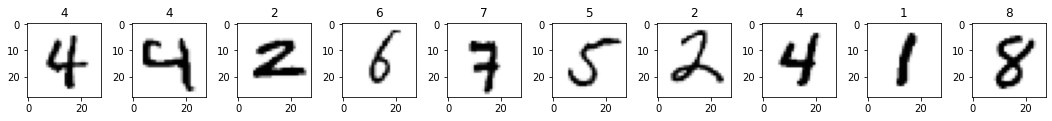

In [0]:
# plot hand-written digits in the test set and our prediction
plot_sample_images(test_X_reshaped.reshape(-1, 28, 28), pred_y)

# Tengwar digits

## load dataset

In [0]:
train = pd.read_csv('/content/drive/My Drive/Digit Recognizer/tengwar_data.csv')
# since the test set has no labels, we won't be using it
# we will just split the test set out from the train set 
print(train.shape)
print(train.iloc[:,0].unique())

(308, 4097)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]


In [0]:
# convert the labels from float to integer
train.iloc[:,0] = train.iloc[:,0].apply(lambda x: int(x))
print(train.iloc[:,0].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [0]:
# Scale the image pixel values from 0-255 to 0-1 range so the neural net can to converge faster
train.iloc[:, 1:] = train.iloc[:, 1:] / 255

In [0]:
train, test = train_test_split(train, test_size=0.25)

In [0]:
print(train.shape)
print(test.shape)

(231, 4097)
(77, 4097)


In [0]:
# Separate the label from the data
train_X = train.iloc[:, 1:].values
train_y = train.iloc[:, 0].values.reshape(-1,1)
test_X = test.iloc[:, 1:].values
test_y = test.iloc[:, 0].values.reshape(-1,1)

In [0]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(231, 4096)
(231, 1)
(77, 4096)
(77, 1)


In [0]:
# function to One-hot encode the categorical values
def one_hot_encode_categories(y):
    
    encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

    y_one_hot = pd.DataFrame(encoder.fit_transform(y), columns=encoder.get_feature_names())
        
    return y_one_hot, encoder

In [0]:
# One hot encode y
train_y_onehot, encoder = one_hot_encode_categories(train_y)
train_y_onehot.columns = pd.DataFrame(train_y_onehot.columns)[0].apply(lambda x: x[3:])

test_y_onehot, encoder = one_hot_encode_categories(test_y)
test_y_onehot.columns = pd.DataFrame(test_y_onehot.columns)[0].apply(lambda x: x[3:])

print(train_y_onehot.head())
print(70*'*')
print(test_y_onehot.head())

0    0    1    2    3    4    5    6    7    8    9   10   11
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
2  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
**********************************************************************
0    0    1    2    3    4    5    6    7    8    9   10   11
0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
4  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0


## display digits

In [0]:
# reshape the train digits into 64x64 entries
# so we can plot those pixels
train_X_reshaped = train_X.reshape(-1,64,64)
test_X_reshaped = test_X.reshape(-1,64,64)

In [0]:
print(train_X_reshaped.shape)
print(test_X_reshaped.shape)

(231, 64, 64)
(77, 64, 64)


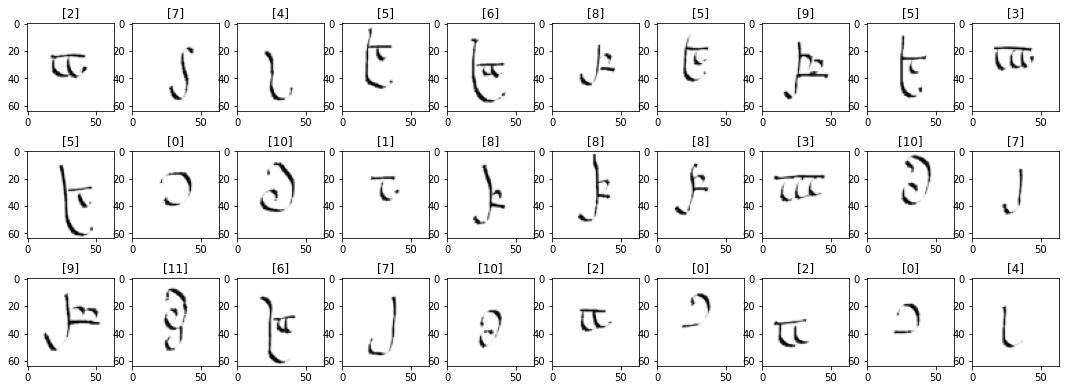

In [0]:
def plot_sample_images(X, y, images_to_show=10, random=True):

    fig = plt.figure(1)

    images_to_show = min(X.shape[0], images_to_show)

    # Set the canvas based on the numer of images
    fig.set_size_inches(18.5, images_to_show * 0.3)

    # Generate random integers (non repeating)
    if random == True:
        idx = np.random.choice(range(X.shape[0]), images_to_show, replace=False)
    else:
        idx = np.arange(images_to_show)
        
    # Print the images with labels
    for i in range(images_to_show):
        plt.subplot(images_to_show/10 + 1, 10, i+1)
        plt.title(str(y[idx[i]]))
        plt.imshow(X[idx[i], :, :], cmap='Greys')


plot_sample_images(train_X_reshaped, train_y, images_to_show=30)

### rescale

interpolation

In [0]:
# rescale images to be 28x28
train_X_rescaled = np.empty((train_X.shape[0], 28,28))

for image in range(train_X.shape[0]):
  for i in range(8):
    for j in range(8):
      train_X_rescaled[image][i,j] = sum(sum(train_X_reshaped[image][3*i:3*i+3, 3*j:3*j+3]))/9

  for i in range(8):
    for j in range(0,20):
      train_X_rescaled[image][i,8+j] = sum(sum(train_X_reshaped[image][3*i:3*i+3, 24+2*j:24+2*j+2]))/6

  for i in range(0,20):
    for j in range(8):
      train_X_rescaled[image][8+i,j] = sum(sum(train_X_reshaped[image][24+2*i:24+2*i+2, 3*j:3*j+3]))/6
  
  for i in range(0,20):
    for j in range(0,20):
      train_X_rescaled[image][8+i,8+j] = sum(sum(train_X_reshaped[image][24+2*i:24+2*i+2, 24+2*j:24+2*j+2]))/4
          

In [0]:
train_X_rescaled.shape

(231, 28, 28)

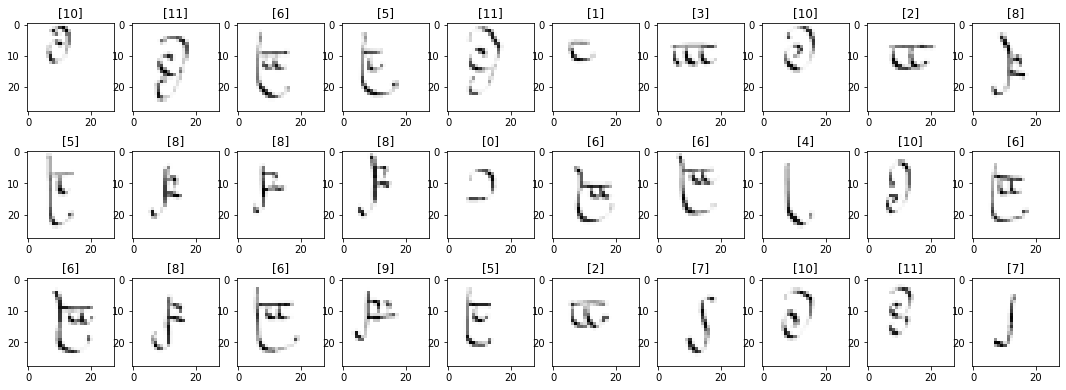

In [0]:
plot_sample_images(train_X_rescaled, train_y, images_to_show=30)

In [0]:
# now that we know this rescaling works, we also rescale our test
# rescale images to be 28x28
test_X_rescaled = np.empty((test_X.shape[0], 28,28))

for image in range(test_X.shape[0]):
  for i in range(8):
    for j in range(8):
      test_X_rescaled[image][i,j] = sum(sum(test_X_reshaped[image][3*i:3*i+3, 3*j:3*j+3]))/9

  for i in range(8):
    for j in range(0,20):
      test_X_rescaled[image][i,8+j] = sum(sum(test_X_reshaped[image][3*i:3*i+3, 24+2*j:24+2*j+2]))/6

  for i in range(0,20):
    for j in range(8):
      test_X_rescaled[image][8+i,j] = sum(sum(test_X_reshaped[image][24+2*i:24+2*i+2, 3*j:3*j+3]))/6
  
  for i in range(0,20):
    for j in range(0,20):
      test_X_rescaled[image][8+i,8+j] = sum(sum(test_X_reshaped[image][24+2*i:24+2*i+2, 24+2*j:24+2*j+2]))/4

In [0]:
test_X_rescaled.shape

(77, 28, 28)

## load pre-trained model

In [0]:
base_model = load_model('/content/drive/My Drive/Digit Recognizer/best_model.h5')

In [0]:
base_model.summary()
# this will be the same model structure as our model above

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 50)        1300      
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 50)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 50)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 50)        200       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 50)        22550     
_________________________________________________________________
activation_2 (Activation)    (None, 10, 10, 50)       

In [0]:
# reshape data for model input
train_X_reshaped = train_X_rescaled.reshape(-1,28,28,1)
test_X_reshaped = test_X_rescaled.reshape(-1,28,28,1)

In [0]:
print("The train image shape: {}".format(train_X_reshaped.shape))
print("The train label shape: {}".format(train_y_onehot.shape))
print("The test label shape: {}".format(test_X_reshaped.shape))
print("The test label shape: {}".format(test_y_onehot.shape))

The train image shape: (231, 28, 28, 1)
The train label shape: (231, 12)
The test label shape: (77, 28, 28, 1)
The test label shape: (77, 12)


## Image Augmentation

Augmentation means creating additional images from the already existing by rotating, mirroring, shearing, blabla the original ones. It is kind of awesome, so check it out later, and hide it in your back pocket in case you will need it. :)

## transfer learning

### remove the last few dense layers

In [0]:
# first, let's pop out the last dense layers 
for i in range(4):
  base_model.pop()

In [0]:
# Compile the model
base_model.compile(loss=categorical_crossentropy, 
              optimizer=Adam(lr=0.0005), 
              metrics=["categorical_accuracy"])
base_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 50)        1300      
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 50)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 50)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 50)        200       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 50)        22550     
_________________________________________________________________
activation_2 (Activation)    (None, 10, 10, 50)       

In [0]:
len(base_model.weights)

12

### add additional dense layers

In [0]:
x = base_model.output
x=Dense(200,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(100,activation='relu')(x) #dense layer 2
preds=Dense(12,activation='softmax')(x) #final layer with softmax activation for our 12 output classes

In [0]:
tengwar_model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

### freeze base layers

In [0]:
tengwar_model.layers[:-3]

In [0]:
for layer in tengwar_model.layers[:-3]:
    layer.trainable=False
for layer in tengwar_model.layers[-3:]:
    layer.trainable=True

In [0]:
tengwar_model.get_config()
# we can see that all the base layers are untrainable

{'input_layers': [['conv2d_1_input', 0, 0]],
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28, 1),
    'dtype': 'float32',
    'name': 'conv2d_1_input',
    'sparse': False},
   'inbound_nodes': [],
   'name': 'conv2d_1_input'},
  {'class_name': 'Conv2D',
   'config': {'activation': 'linear',
    'activity_regularizer': None,
    'batch_input_shape': (None, 28, 28, 1),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'dtype': 'float32',
    'filters': 50,
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'distribution': 'uniform',
      'mode': 'fan_avg',
      'scale': 1.0,
      'seed': None}},
    'kernel_regularizer': None,
    'kernel_size': (5, 5),
    'name': 'conv2d_1',
    'padding': 'valid',
    'strides': (1, 1),
    'trainable': False,
  

In [0]:
# Compile the model
tengwar_model.compile(loss=categorical_crossentropy, 
              optimizer=Adam(lr=0.0005), 
              metrics=["categorical_accuracy"])
tengwar_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 50)        1300      
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 50)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 50)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 50)        200       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 50)        2255

### model training

In [0]:
# Let's train the model and also save the best model weights so we can use them later
history = tengwar_model.fit(train_X_reshaped, train_y_onehot,
                    batch_size=30,
                    validation_data=(test_X_reshaped, test_y_onehot),
                    epochs=5)

Train on 231 samples, validate on 77 samples
Epoch 1/5
231/231 [==============================] - 0s 2ms/step - loss: 2.1965 - categorical_accuracy: 0.3117 - val_loss: 1.6922 - val_categorical_accuracy: 0.6364
Epoch 2/5
231/231 [==============================] - 0s 927us/step - loss: 0.8357 - categorical_accuracy: 0.8571 - val_loss: 1.1113 - val_categorical_accuracy: 0.7532
Epoch 3/5
231/231 [==============================] - 0s 962us/step - loss: 0.3724 - categorical_accuracy: 0.9307 - val_loss: 0.8233 - val_categorical_accuracy: 0.7922
Epoch 4/5
231/231 [==============================] - 0s 970us/step - loss: 0.1809 - categorical_accuracy: 0.9827 - val_loss: 0.6898 - val_categorical_accuracy: 0.8442
Epoch 5/5
231/231 [==============================] - 0s 970us/step - loss: 0.1085 - categorical_accuracy: 0.9913 - val_loss: 0.6368 - val_categorical_accuracy: 0.8182


In [0]:
# evaluate the model
scores = tengwar_model.evaluate(test_X_reshaped, test_y_onehot, verbose=0)
print("validation %s: %.2f%%" % (tengwar_model.metrics_names[1], scores[1]*100))

validation categorical_accuracy: 81.82%


In [0]:
tengwar_model.save("/content/drive/My Drive/Digit Recognizer/best_tengwar_model.h5")

In [0]:
pred_y_onehot = tengwar_model.predict(test_X_reshaped)
# this will return the one-hot encoded version

In [0]:
# transform back to just output 1 class
pred_y = encoder.inverse_transform(pred_y_onehot)[:,0]

In [0]:
np.unique(pred_y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

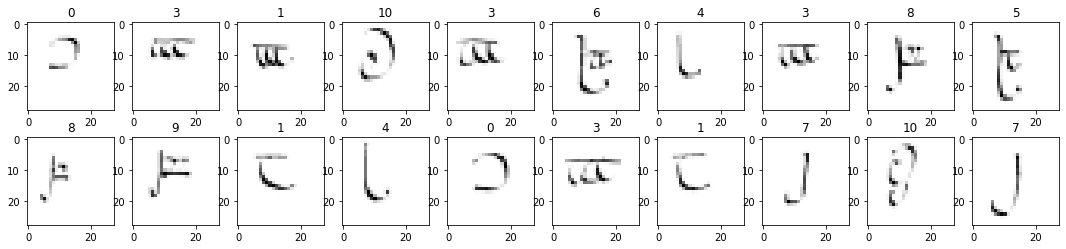

In [0]:
# plot hand-written digits in the test set and our prediction
plot_sample_images(test_X_reshaped.reshape(-1, 28, 28), pred_y, images_to_show=20)

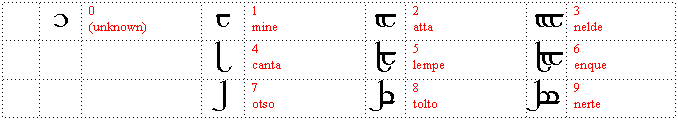

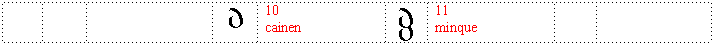

we can see that `[0,2]` is misclassified to be 1 when it is actually 3, and `[1,8]` is misclassified to be 10 when it is actually 11. So about 80% accuracy as returned by the evaluation metric.